In [ ]:
'''
In this lab, preliminary data analysis of Boston dataset, you will be performing all the 
techniques you have learned in this class to Boston.csv, a Boston housing dataset.

2. The dataset has been provided on Canvas. 
3. Use the code you have used in the past lectures/labs for preliminary data analysis and 
exploratory data analysis. Assume the median price as the output and one of the input 
features with the strongest correlation with the output as your input feature. 
4. Design a linear regression model between the selected feature and the median price 
using the provided sample code as a guide. 
5. Determine the model parameters and R^2 (r squared score). How do you interpret the 
score? 
6. Upload your code and description of the results of the regression model as a .py 
file and a document to Canvas before the deadline. 

'''1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import read_csv
import numpy as np

filename = 'boston.csv'
data = read_csv(filename)

In [3]:
data.head(2)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [4]:
names = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
data = data[names]

In [5]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

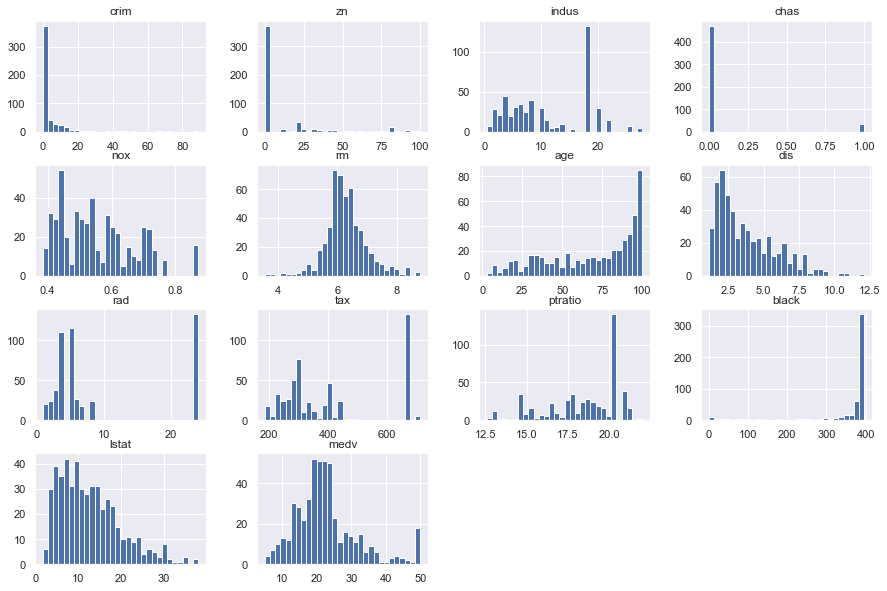

In [23]:
data.hist(bins=30, figsize=(15, 10))


<AxesSubplot:>

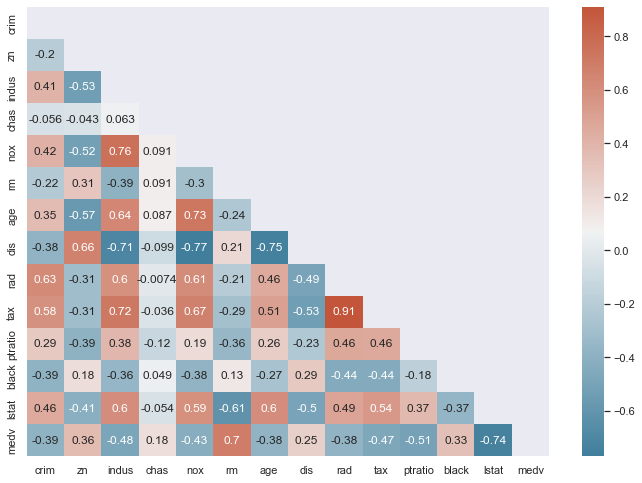

In [6]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

[Text(0.5, 1.0, 'Residuals')]

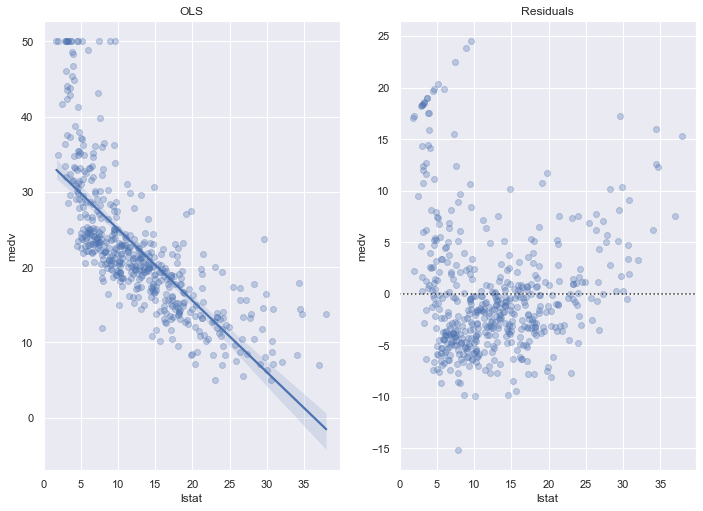

In [18]:
# Highest Correlation is -0.74 between lstat and medv. 
'''
x = sns.regplot(x="lstat", 
                y="medv", 
                data=data, 
                scatter_kws={'alpha':0.3})
'''

fig, ax =plt.subplots(1,2)

sns.regplot(x="lstat", y='medv', scatter_kws={'alpha':0.3}, data=data, ax=ax[0]).set(title='OLS')
sns.residplot(data=data, x="lstat", y='medv', scatter_kws={'alpha':0.3}, ax=ax[1]).set(title='Residuals')


[Text(0.5, 1.0, 'Residuals')]

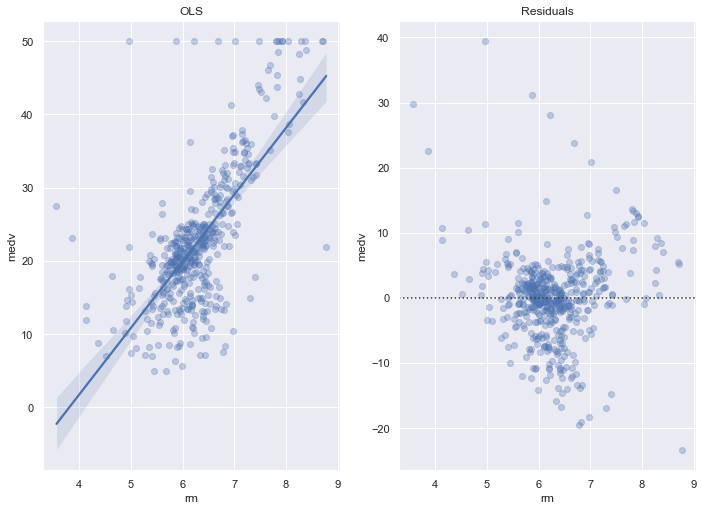

In [19]:
# Highest Correlation is +0.7 between rm and medv. 

fig, ax =plt.subplots(1,2)

sns.regplot(x="rm", y='medv', scatter_kws={'alpha':0.3}, data=data,ax=ax[0]).set(title='OLS')
sns.residplot(data=data, x="rm", y='medv', scatter_kws={'alpha':0.3}, ax=ax[1]).set(title='Residuals')


In [22]:
import statsmodels.api as sm

x = data[['lstat']]
#x = data[['lstat','rm']]
y = data['medv']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           5.08e-88
Time:                        22:08:51   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [21]:
model.params

const   -1.358273
lstat   -0.642358
rm       5.094788
dtype: float64

In [ ]:
'''
The r-squared value = 0.544. 

R- squared value: R-squared value ranges between 0 and 1. 
An R-squared of 0.544 imples that 54.4% of variance in the dependent variable (median value) is  
 explained by changes in the independent variable( lstat). 


'''
